## Data Dictionary
Age: Age of the gym member. \
Gender: Gender of the gym member (Male or Female). \
Weight (kg): Member’s weight in kilograms. \
Height (m): Member’s height in meters. \
Max_BPM: Maximum heart rate (beats per minute) during workout sessions. \
Avg_BPM: Average heart rate during workout sessions. \
Resting_BPM: Heart rate at rest before workout. \
Session_Duration (hours): Duration of each workout session in hours. \
Calories_Burned: Total calories burned during each session. \
Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT). \
Fat_Percentage: Body fat percentage of the member. \
Water_Intake (liters): Daily water intake during workouts. \
Workout_Frequency (days/week): Number of workout sessions per week. \
Experience_Level: Level of experience, from beginner (1) to expert (3). \
BMI: Body Mass Index, calculated from height and weight. 

In [32]:
# load in data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
gym_data = pd.read_csv("gym_members_exercise_tracking.csv")

In [34]:
gym_data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [35]:
"""
My stats (Needed from workout = ~, unsure = /):
 Age: 25
 Gender: Male
 Weight (kg): 77.1
 Height (m): 1.82
 Max BPM:    ~
 Avg BPM:    ~
 Resting BPM:    /
 Session duration (hours):    ~
 Calories burned: <target variable> 
 Workout_Type:   ~ (Probably strength)
 Fat_Percentage: /
 Water intake: ~ / 
 Workout frequency: days per week
 Experience level: 3
 BMI:  /
 
"""

'\nMy stats (Needed from workout = ~, unsure = /):\n Age: 25\n Gender: Male\n Weight (kg): 77.1\n Height (m): 1.82\n Max BPM:    ~\n Avg BPM:    ~\n Resting BPM:    /\n Session duration (hours):    ~\n Calories burned: <target variable> \n Workout_Type:   ~ (Probably strength)\n Fat_Percentage: /\n Water intake: ~ / \n Workout frequency: days per week\n Experience level: 3\n BMI:  /\n \n'

Change column names to something more usable

In [36]:
gym_data.columns = ['age',	'gender',	'weight', 'height', 'max_bpm',	'avg_bpm',
                    'resting_bpm',	'session_duration',	'calories_burned',	'workout_type',
                    'fat_percentage',	'water_intake', 'workout_frequency', 'experience_level',
                    'BMI']

Check for NaNs and values that make no sense

In [37]:
len(gym_data)

973

In [38]:
gym_data.describe()

,age,weight,height,max_bpm,avg_bpm,resting_bpm,session_duration,calories_burned,fat_percentage,water_intake,workout_frequency,experience_level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Values look good, lets encode the categorical ones

In [39]:
gym_data['gender'].value_counts()

gender
Male      511
Female    462
Name: count, dtype: int64

Let's make the Gender column the following: \
If gender is male, gender = 1
If gender is female, gender = 0 

In [40]:
gym_data['gender_encoded'] = gym_data['gender'].apply(lambda x : 1 if x == 'Male' else 0)
gym_data['gender_encoded'].value_counts()

gender_encoded
1    511
0    462
Name: count, dtype: int64

In [41]:
gym_data['workout_type'].value_counts()

workout_type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

Lets create an ordinally encoded column and a onehot encoded column for workout type

In [42]:
gym_data['workout_type_ordinal'] = gym_data['workout_type'].apply(lambda x: 0 if x == 'Strength' else 1 if x == 'Cardio' else 2 if x == 'Yoga' else 3)
gym_data['workout_type_ordinal'].value_counts()

workout_type_ordinal
0    258
1    255
2    239
3    221
Name: count, dtype: int64

In [43]:
gym_data['strength_dummy'] = gym_data['workout_type'].apply(lambda x:1 if x == 'Strength' else 0)
gym_data['cardio_dummy'] = gym_data['workout_type'].apply(lambda x:1 if x == 'Cardio' else 0)
gym_data['yoga_dummy'] = gym_data['workout_type'].apply(lambda x:1 if x == 'Yoga' else 0)
for col_name in ['strength_dummy', 'cardio_dummy', 'yoga_dummy']:
    print(col_name, sum(gym_data[col_name]))

strength_dummy 258
cardio_dummy 255
yoga_dummy 239


# Exploratory Data Analysis

Display the distribution of each numeric variable, include effects of categorical variables

In [44]:
numeric_columns = ['age',  'weight', 'height', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration',
       'fat_percentage', 'water_intake', 'workout_frequency',
       'experience_level', 'BMI']
response_column = ['calories_burned']
categorical_columns = ['gender', 'workout_type']
encoded_categorical_columns = ['gender_encoded','workout_type_ordinal', 'strength_dummy',
       'cardio_dummy', 'yoga_dummy']

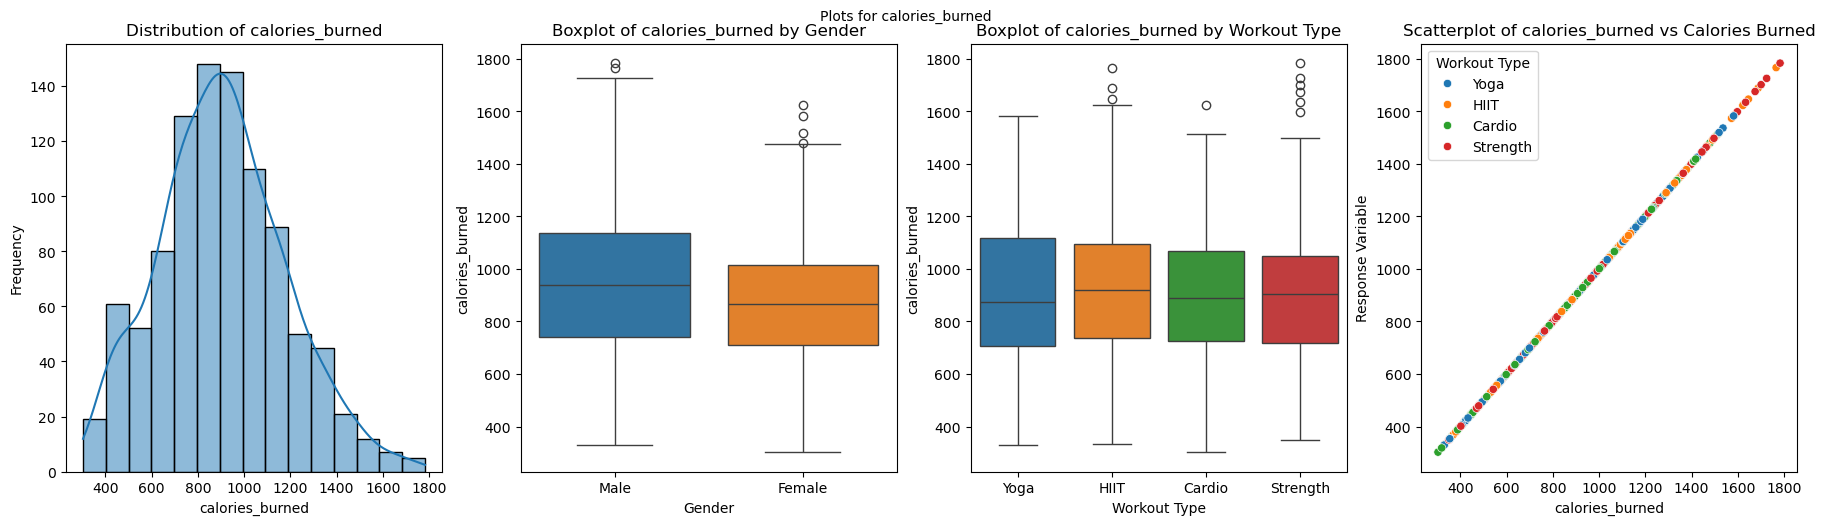

In [58]:
def plot_numeric(col_name):
    fig, axes = plt.subplots(1, 4, figsize=(18, 5), constrained_layout=True)

    # 1. Numeric Distribution
    sns.histplot(gym_data[col_name], kde=True, bins=15, ax=axes[0])
    axes[0].set_title(f'Distribution of {col_name}')
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel('Frequency')

    # 2. Boxplot for Value Variation by Categorical Columns
    sns.boxplot(x='gender', y=col_name, hue = 'gender', data=gym_data, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col_name} by Gender')
    axes[1].set_xlabel('Gender')
    axes[1].set_ylabel(col_name)

    sns.boxplot(x='workout_type', y=col_name, hue = 'workout_type', data=gym_data, ax=axes[2])
    axes[2].set_title(f'Boxplot of {col_name} by Workout Type')
    axes[2].set_xlabel('Workout Type')
    axes[2].set_ylabel(col_name)

    # 3. Scatterplot vs Response Variable
    sns.scatterplot(x=gym_data[col_name], y=gym_data['calories_burned'], hue=gym_data['workout_type'], ax=axes[3])
    axes[3].set_title(f'Scatterplot of {col_name} vs Calories Burned')
    axes[3].set_xlabel(col_name)
    axes[3].set_ylabel('Response Variable')
    axes[3].legend(title='Workout Type')

    # Show the plots
    plt.suptitle(f'Plots for {col_name}', fontsize=10, y=1.02)
    plt.show()

plot_numeric('calories_burned')

Response variable is rought normal, (more likely some kind of Gamma distribution due to the strict positivity of values and left tail)

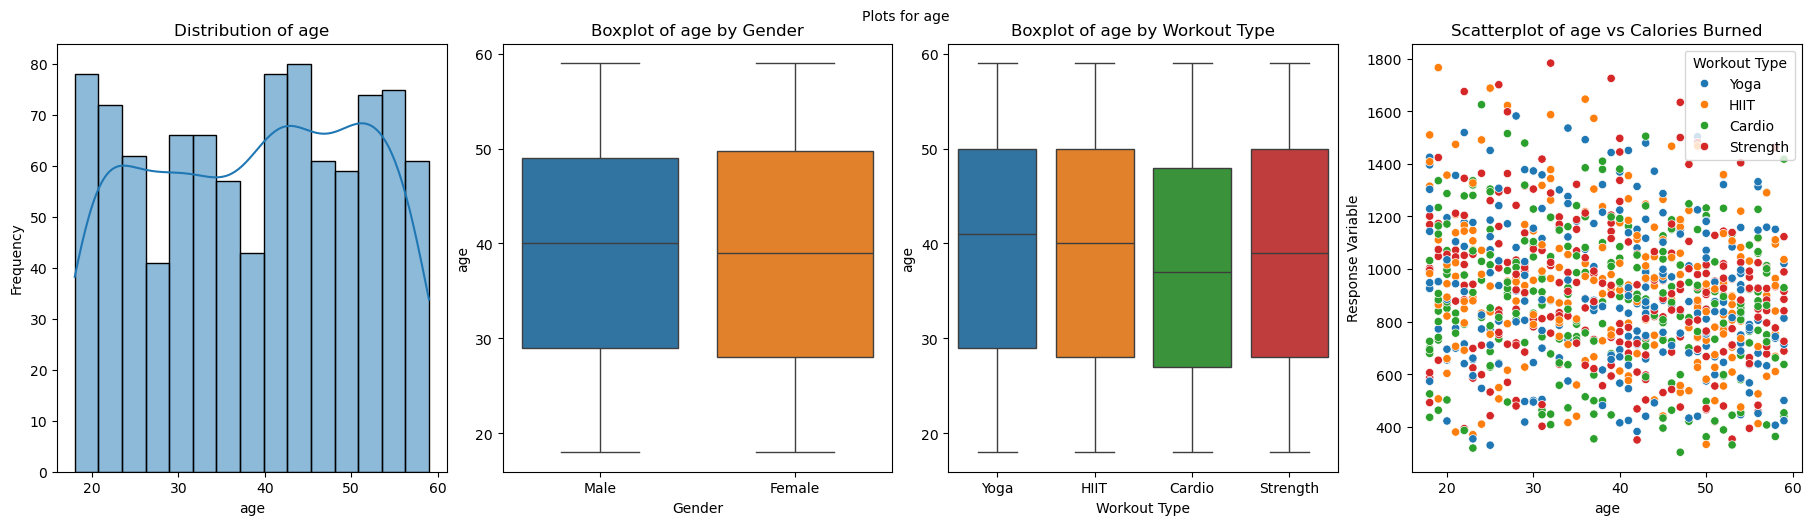

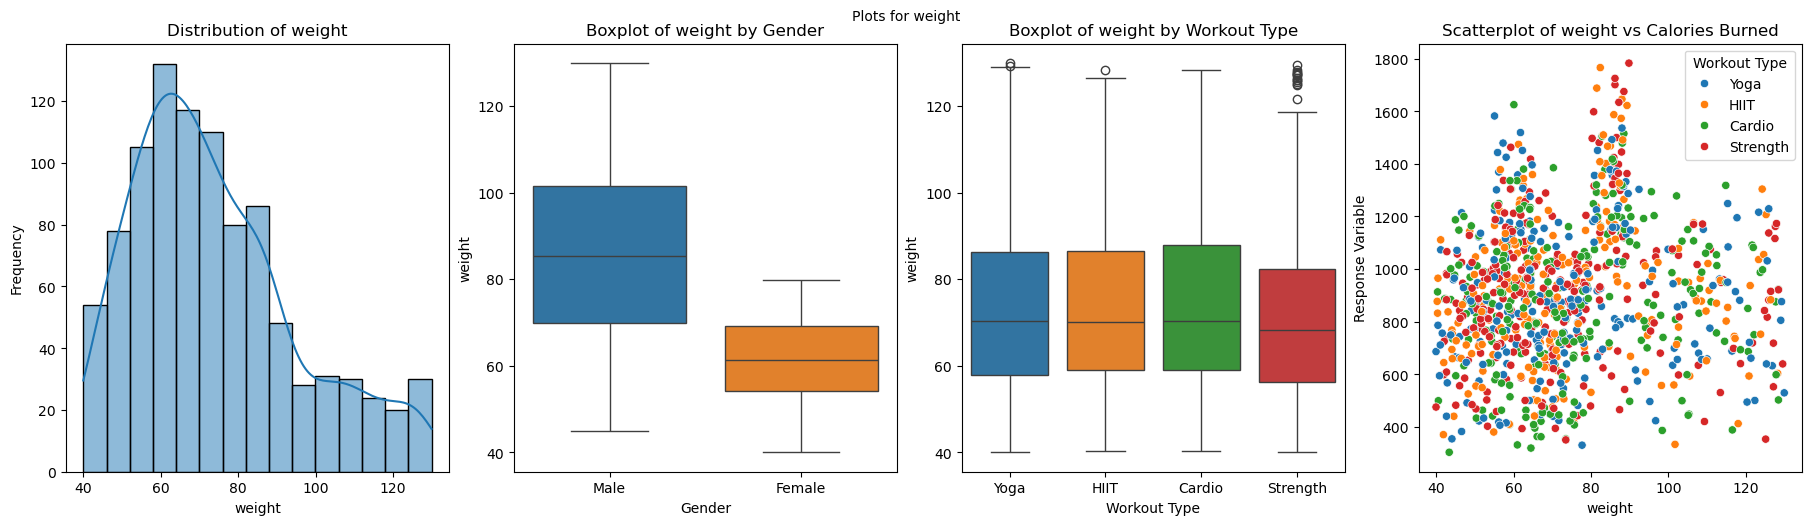

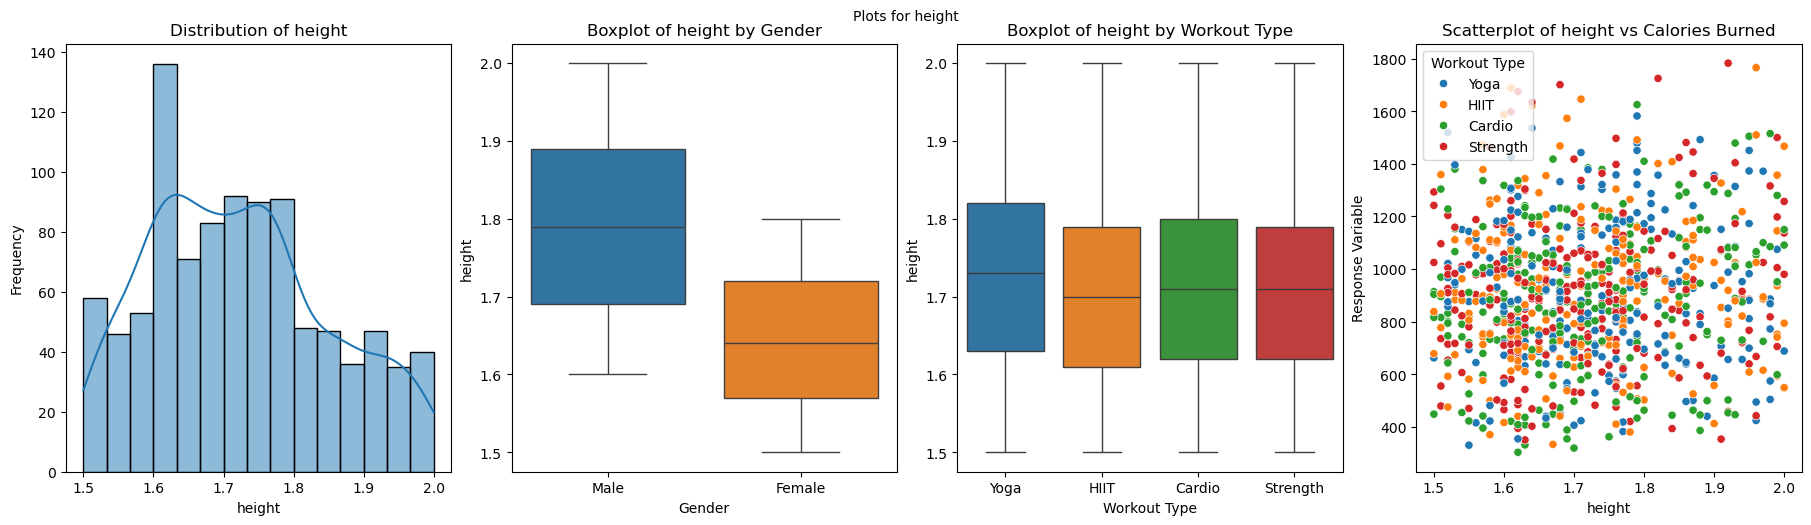

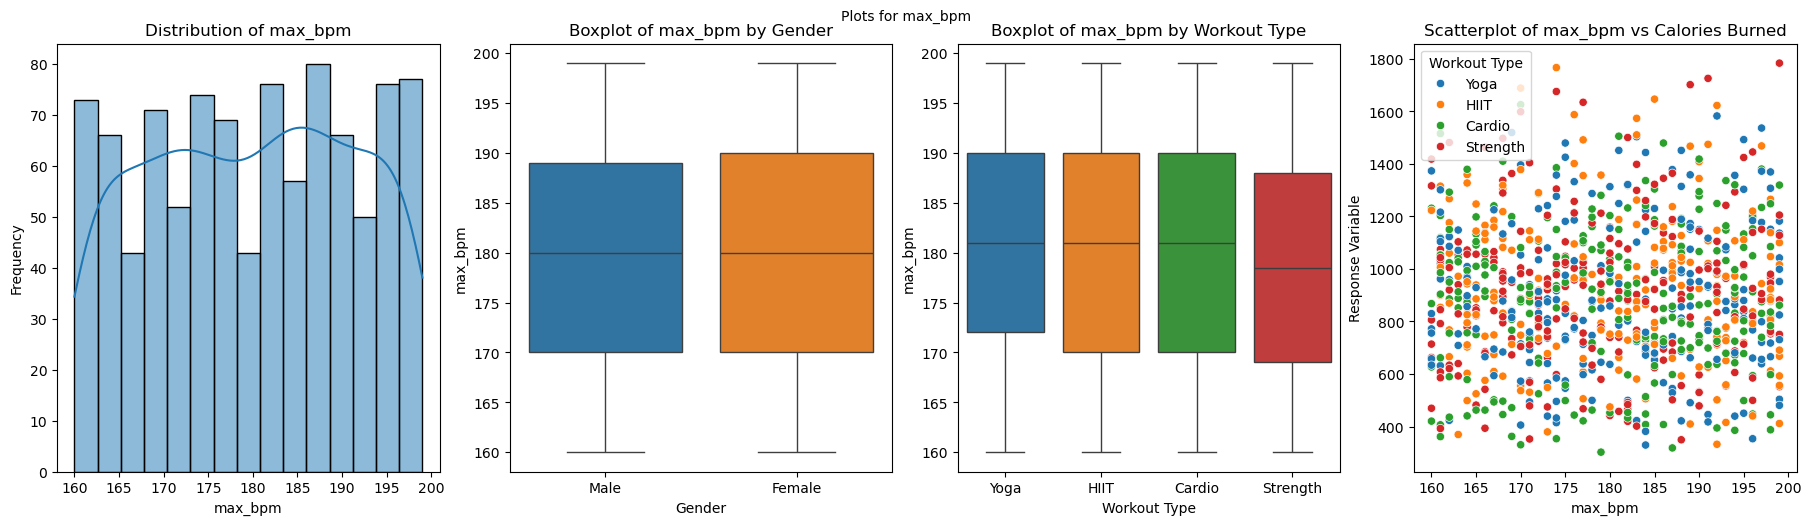

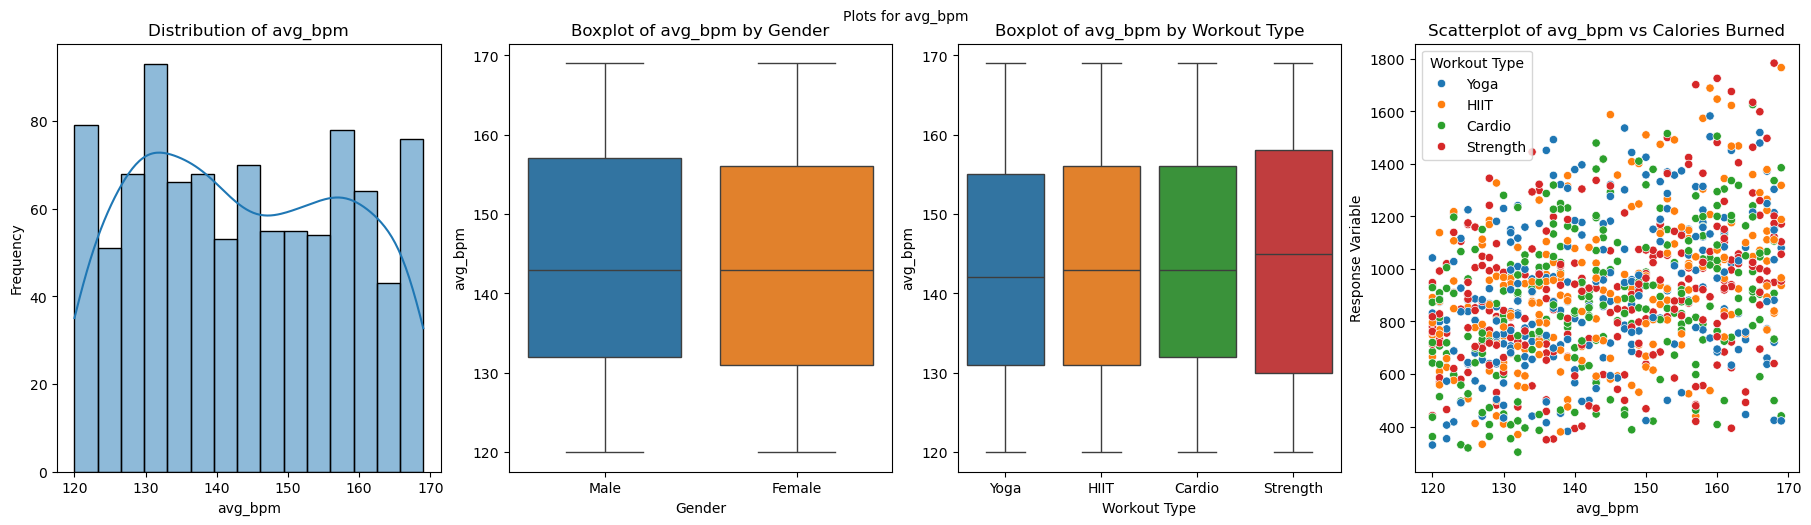

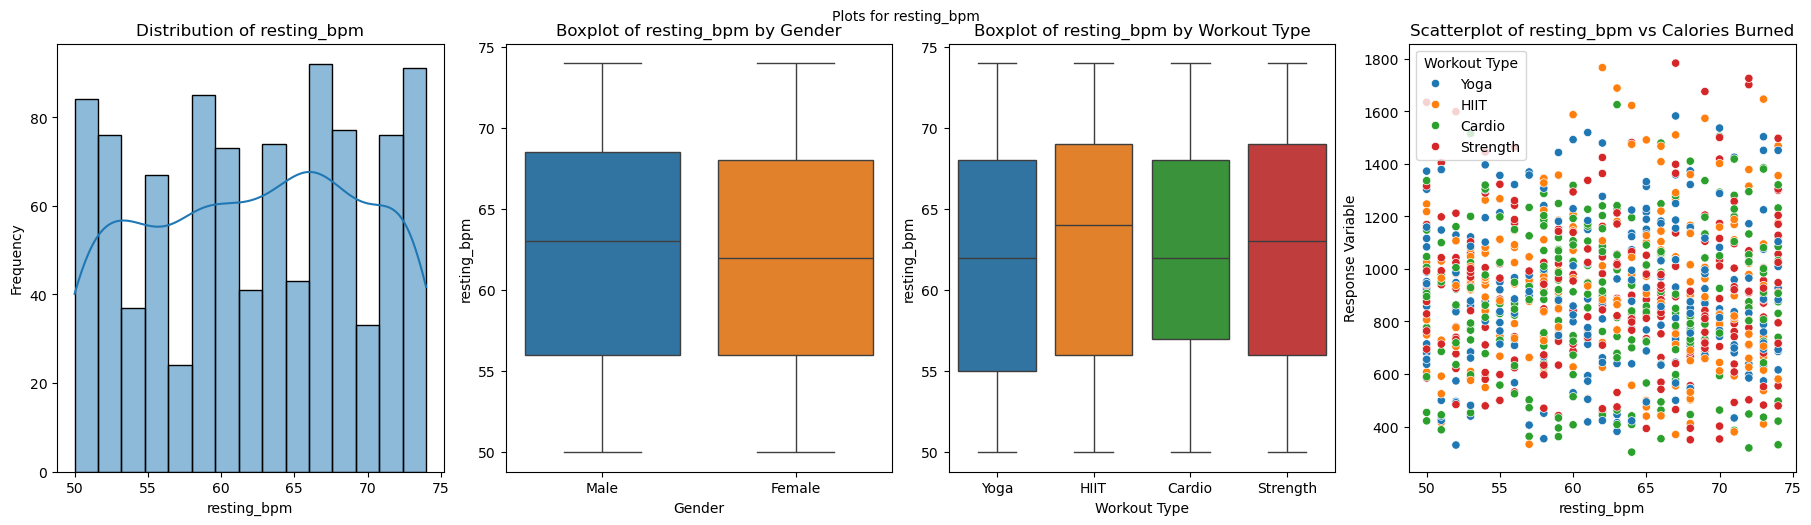

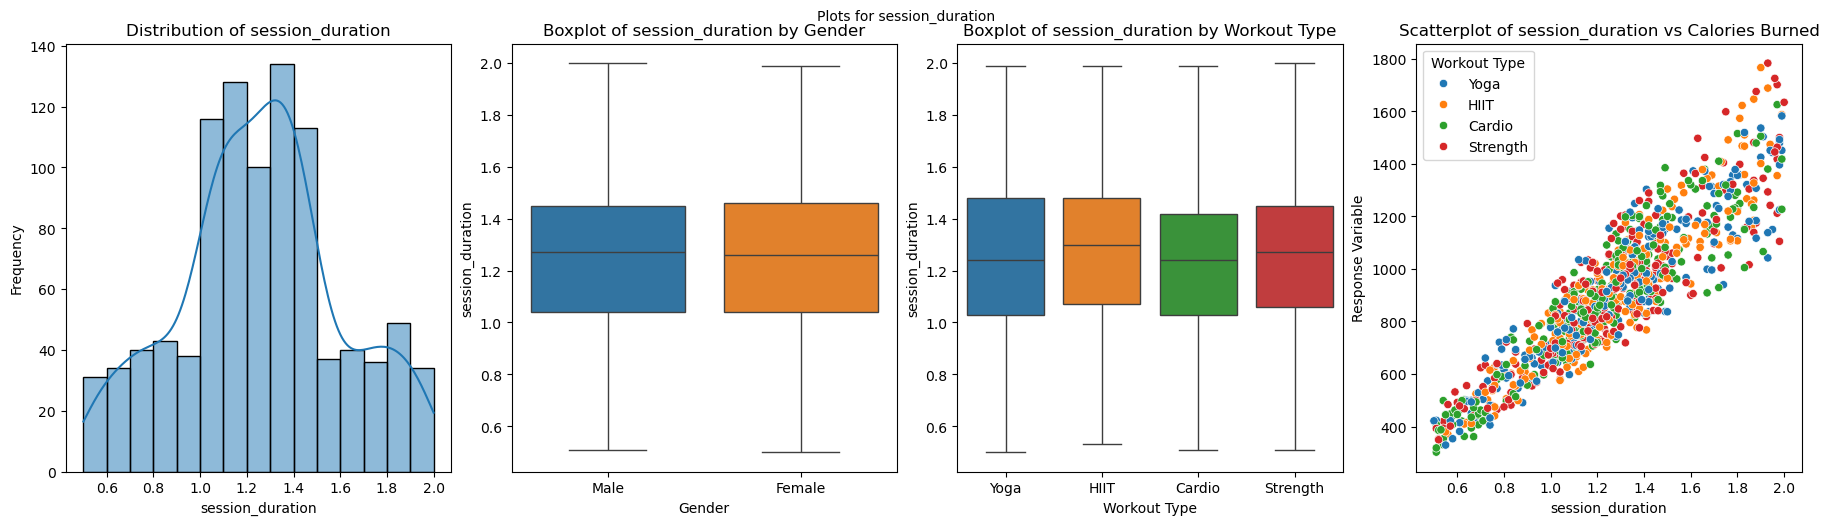

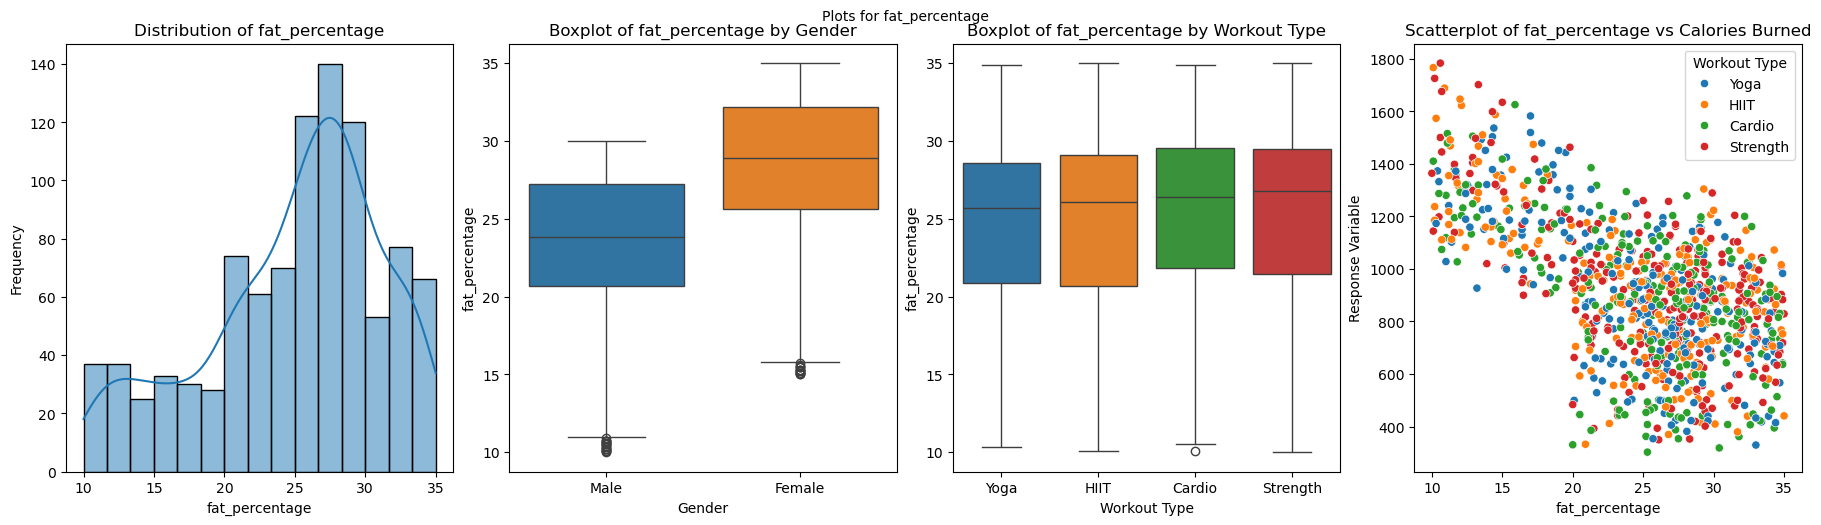

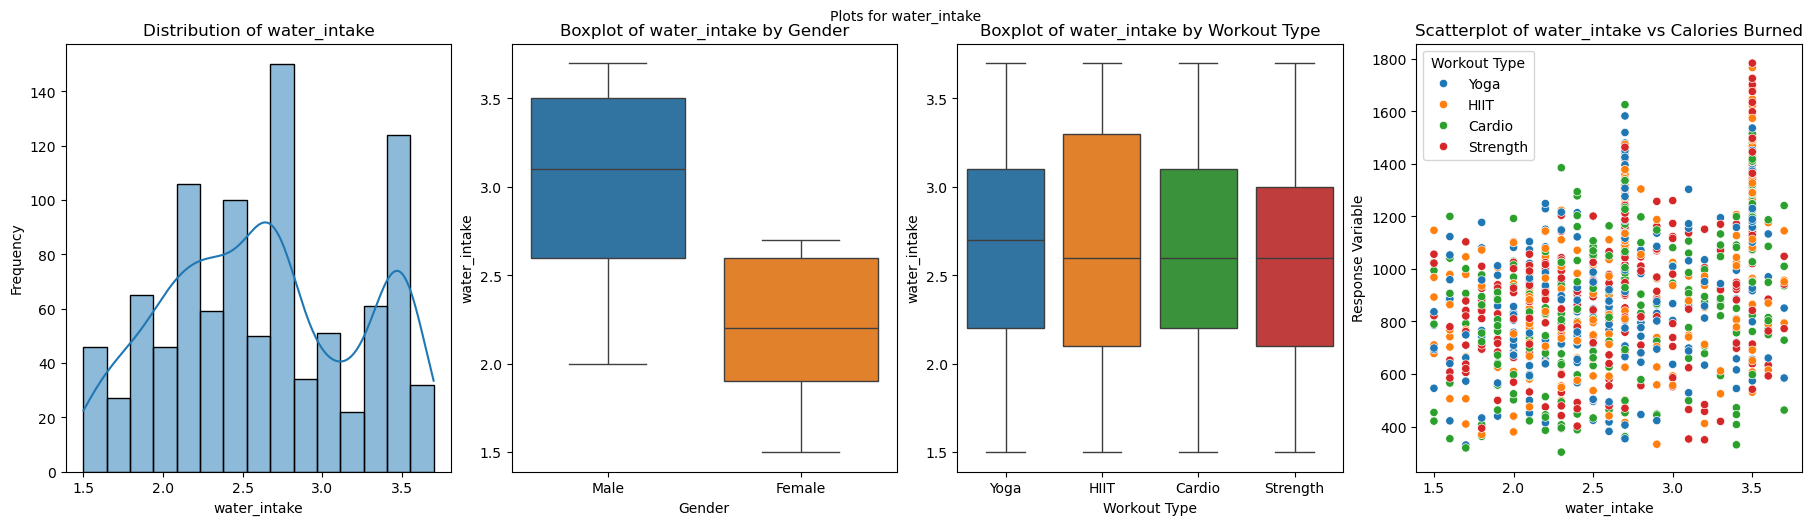

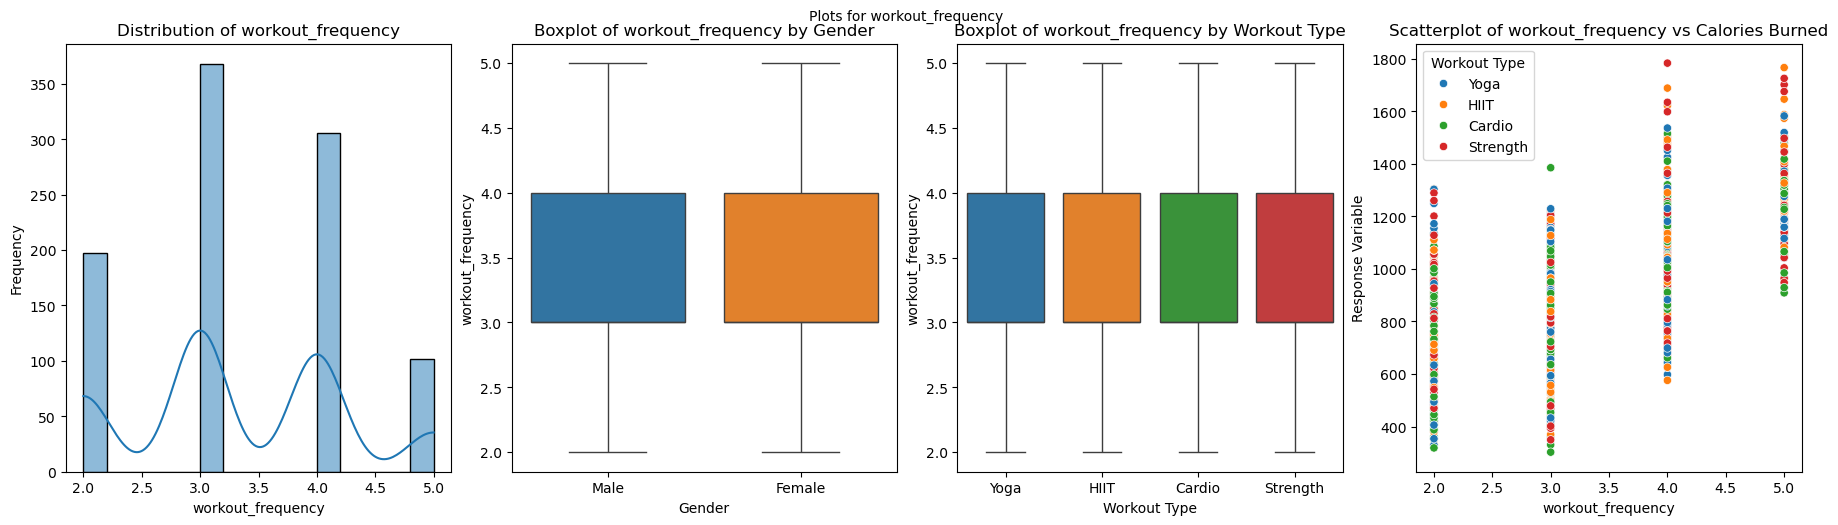

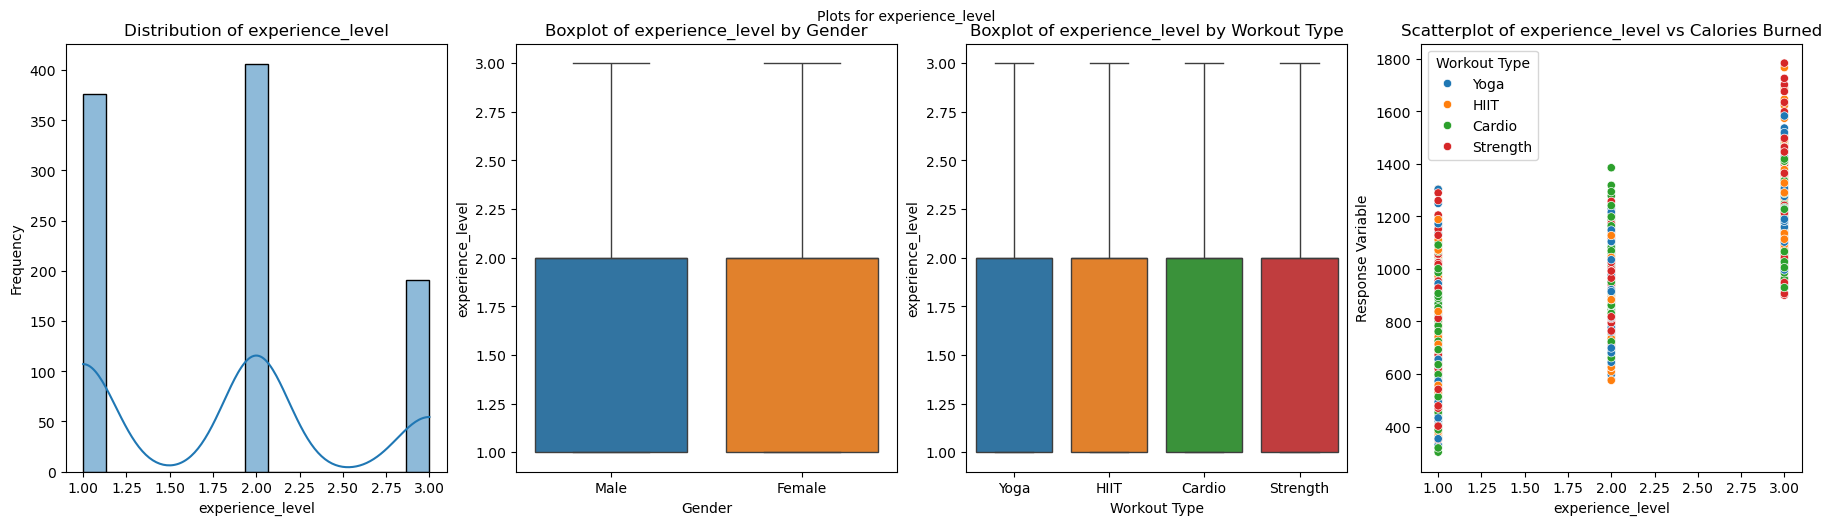

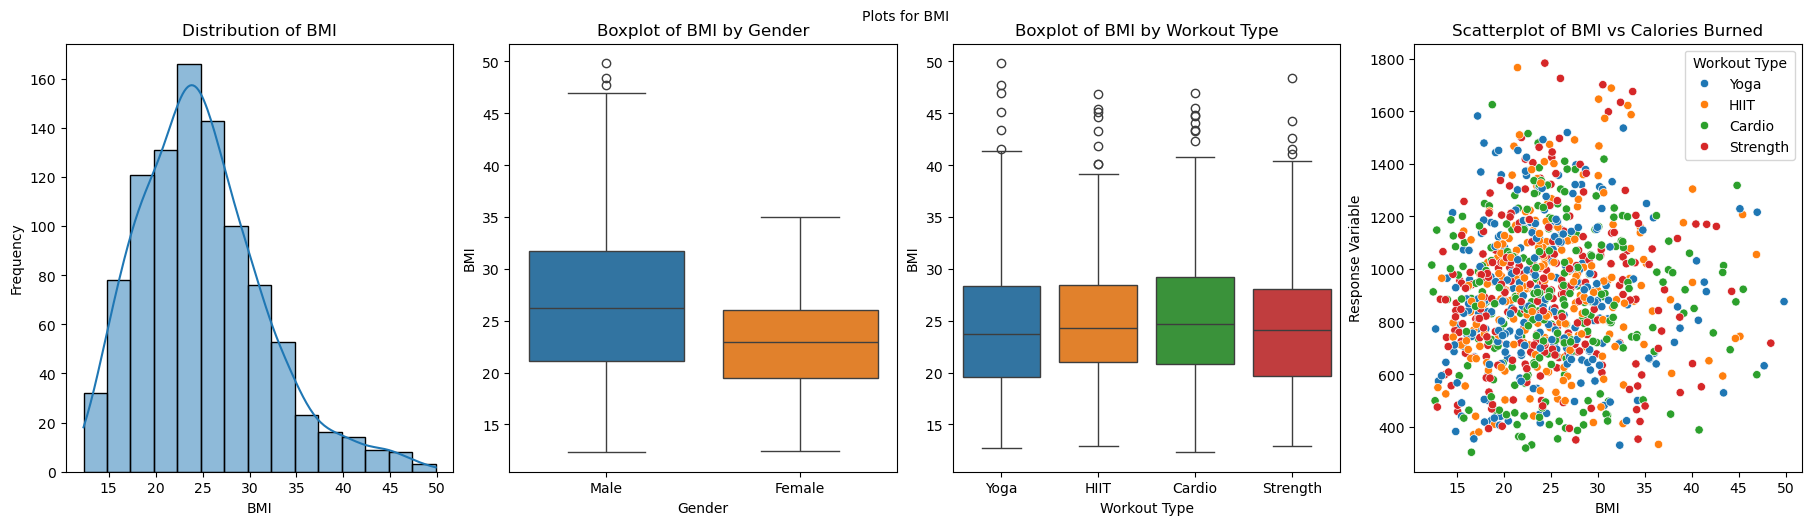

In [59]:
for numeric_col in numeric_columns:
    if numeric_col != 'calories_burned':
        plot_numeric(numeric_col)

Expecting strong association with response in Session Duration and Fat Percentage \

### Check correlations

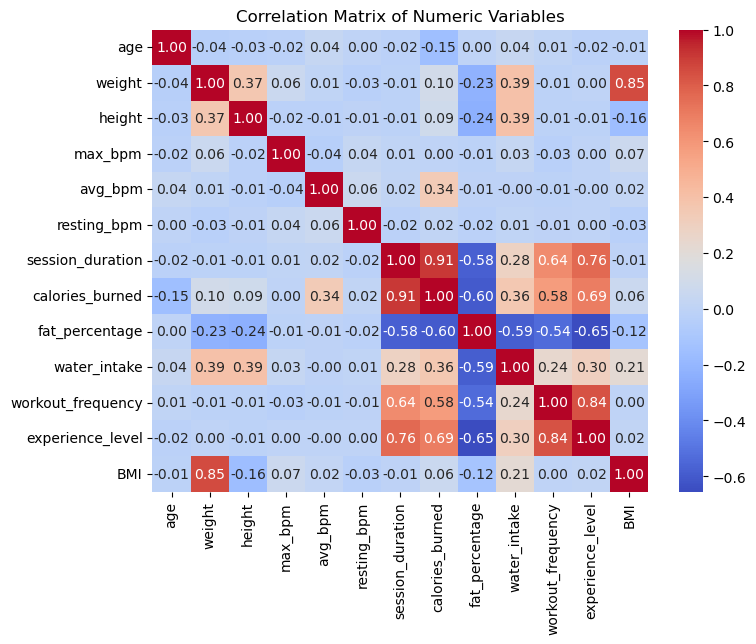

In [62]:
numeric_data = gym_data[numeric_columns]
correlation_matrix = numeric_data.corr()

# pearson correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Matrix of Numeric Variables")
plt.show()

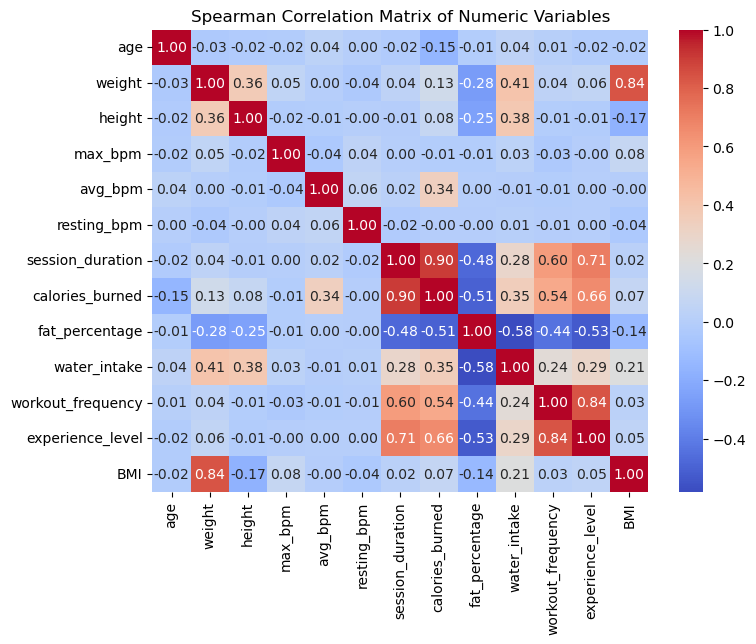

In [64]:
numeric_data = gym_data[numeric_columns]
correlation_matrix = numeric_data.corr(method = 'spearman')

# spearman correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Spearman Correlation Matrix of Numeric Variables")
plt.show()

There is potential problematic correlations between: \
Weight & BMI \
Weight & Water Intake \
Height & Water Intake \
Session Duration & Fat Percentage \
Session Duration & Workout Frequency \
Session Duration & Experience Level \
Fat Percentage & Water Intake \
Fat Percentage & Workout Frequency \
Fat Percentage & Experience Level  \
Experience Level & Workout Frequency  

# Baseline model
Define train/test sets 

In [71]:
from sklearn.model_selection import train_test_split

train_data_full, test_data_full = train_test_split(gym_data, test_size=0.2, random_state=123)

print("Train length:", len(train_data_full))
print("Test length:", len(test_data_full))

Train length: 778
Test length: 195


In [75]:
train_data_full.columns

Index(['age', 'gender', 'weight', 'height', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration', 'calories_burned', 'workout_type',
       'fat_percentage', 'water_intake', 'workout_frequency',
       'experience_level', 'BMI', 'gender_encoded', 'workout_type_ordinal',
       'strength_dummy', 'cardio_dummy', 'yoga_dummy'],
      dtype='object')

In [74]:
numeric_columns

['age',
 'weight',
 'height',
 'max_bpm',
 'avg_bpm',
 'resting_bpm',
 'session_duration',
 'calories_burned',
 'fat_percentage',
 'water_intake',
 'workout_frequency',
 'experience_level',
 'BMI']

Multiple Linear Regression using all variables (dummy varaibles for workout_type)

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Mean Squared Error: 1251.5676341702278
RMSE: 35.37750180793194
R² Score: 0.9830557063417006


In [102]:
sm_train_x_dummy_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
sm_train_x_ordinal_vars = train_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
sm_train_y = train_data_full[['calories_burned']]

# test sets
sm_test_x_dummy_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'strength_dummy', 'cardio_dummy', 'yoga_dummy']]
sm_test_x_ordinal_vars = test_data_full[['age','weight','height','max_bpm','avg_bpm','resting_bpm','session_duration','fat_percentage',
 'water_intake','workout_frequency','experience_level','BMI', 'gender_encoded', 'workout_type_ordinal']]
sm_test_y = test_data_full[['calories_burned']]

In [103]:
sm_train_x_dummy_vars = sm.add_constant(train_x_dummy_vars)

# Fit the model using statsmodels
baseline_mlr = sm.OLS(sm_train_y, sm_train_x_dummy_vars).fit()

# Get the summary
print(baseline_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:        calories_burned   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2145.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:37:54   Log-Likelihood:                -3975.7
No. Observations:                 778   AIC:                             7985.
Df Residuals:                     761   BIC:                             8065.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -994.9950    102.31

In [104]:
sm_test_x_dummy_vars = sm.add_constant(sm_test_x_dummy_vars)

predictions = baseline_mlr.predict(sm_test_x_dummy_vars)

# Example: Evaluate model predictions on test data
mse = mean_squared_error(sm_test_y, predictions)
r2 = r2_score(test_y, predictions)

print("Mean Squared Error:", mse)
print("RMSE:", mse**(0.5))
print("R² Score:", r2)

Mean Squared Error: 1251.5676341702226
RMSE: 35.37750180793187
R² Score: 0.9830557063417007


Issues with this model: \
Residuals do not appear to be normally distributed based on Omnibus and Jarque Bera.  \
There appears to be a high degree of multicollinearity between varaibles based on the condition number \

$R^2$ value is high though so the model is promising once these issues are addressed

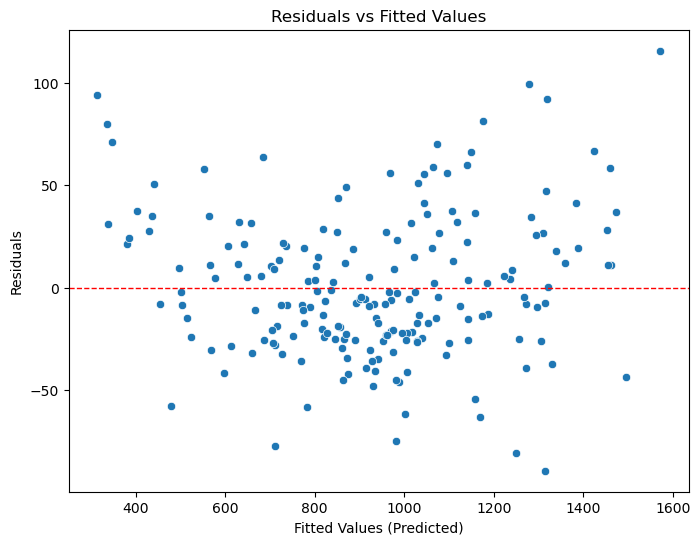

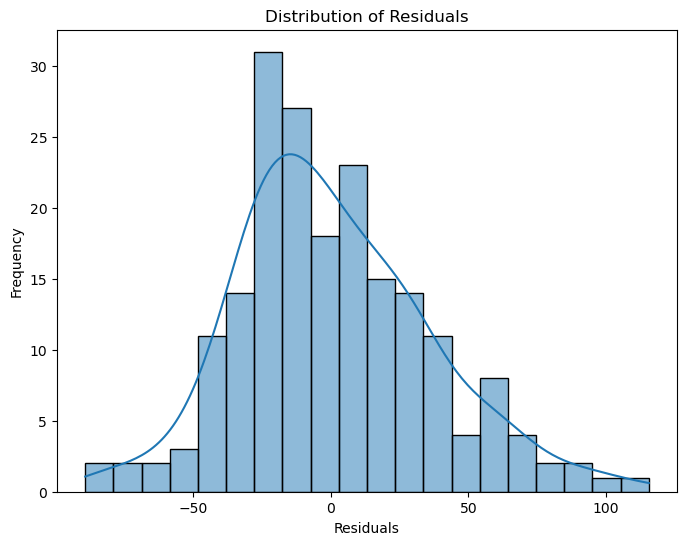

In [105]:
test_predictions = baseline_mlr.predict(sm_test_x_dummy_vars)
residuals = sm_test_y['calories_burned'] - test_predictions

# Step 2: Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()

# Step 3: Plot Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Residuals are not quite normally distributted, but they are getting there

Second MLR model, addressing multicollinearity \
- Remove weight - BMI and other variables should be able to capture this (Consdier dropping height too)
- Remove workout frequency, very correlated and probably not too useful of a predictor in this context 
- remove workout type variables
- remove experience level - not appearing to be a strong predictor
- remove water intake - correlated with varaibles and does not appear to be too significant of a predictor
- remove max_bpm - seems like an insignificant predictor
- remove height - seems like an insignificant predictor
- remove resting bpm and bmi for insignificance

Session Duration & Fat Percentage \
Since these two are correlated, we could try making them into an interaction term.
Tested - does not impact results significantly. Can try to make them into a PCA

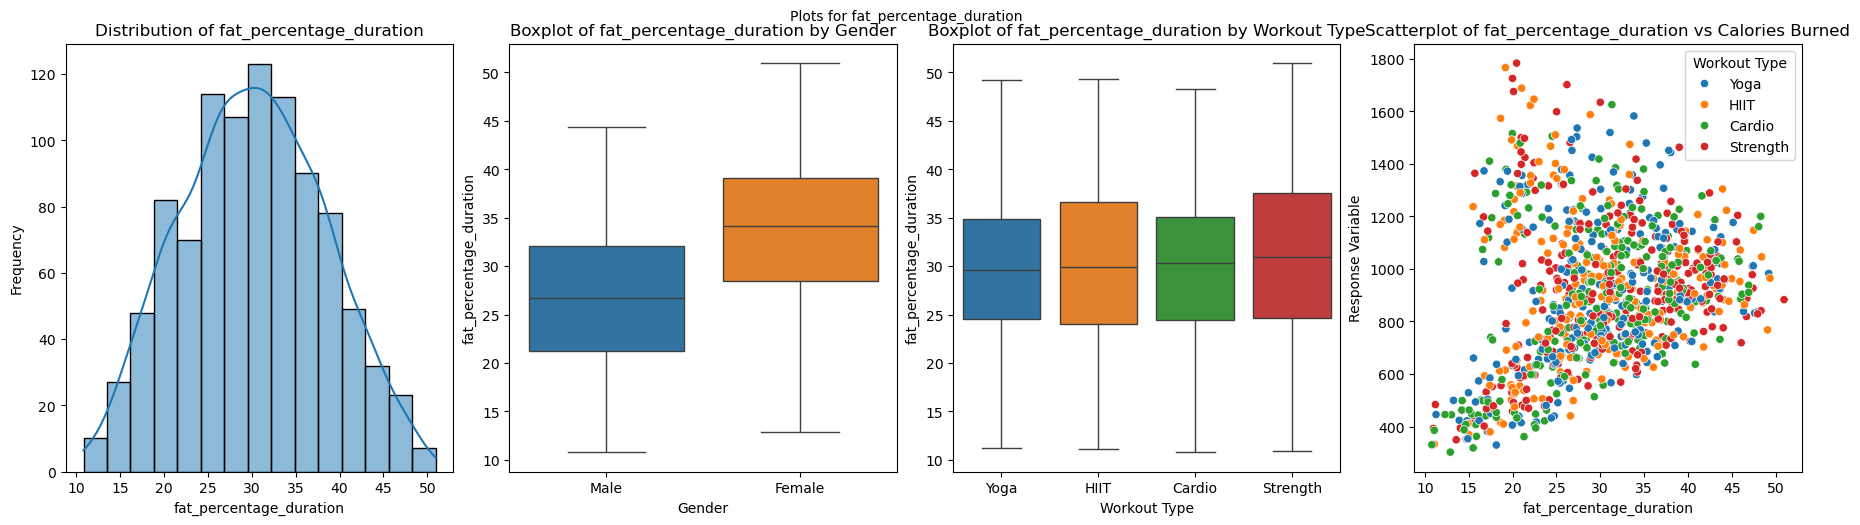

In [142]:
import math
gym_data['fat_percentage_duration'] = gym_data['fat_percentage'] * gym_data['session_duration']
plot_numeric('fat_percentage_duration')

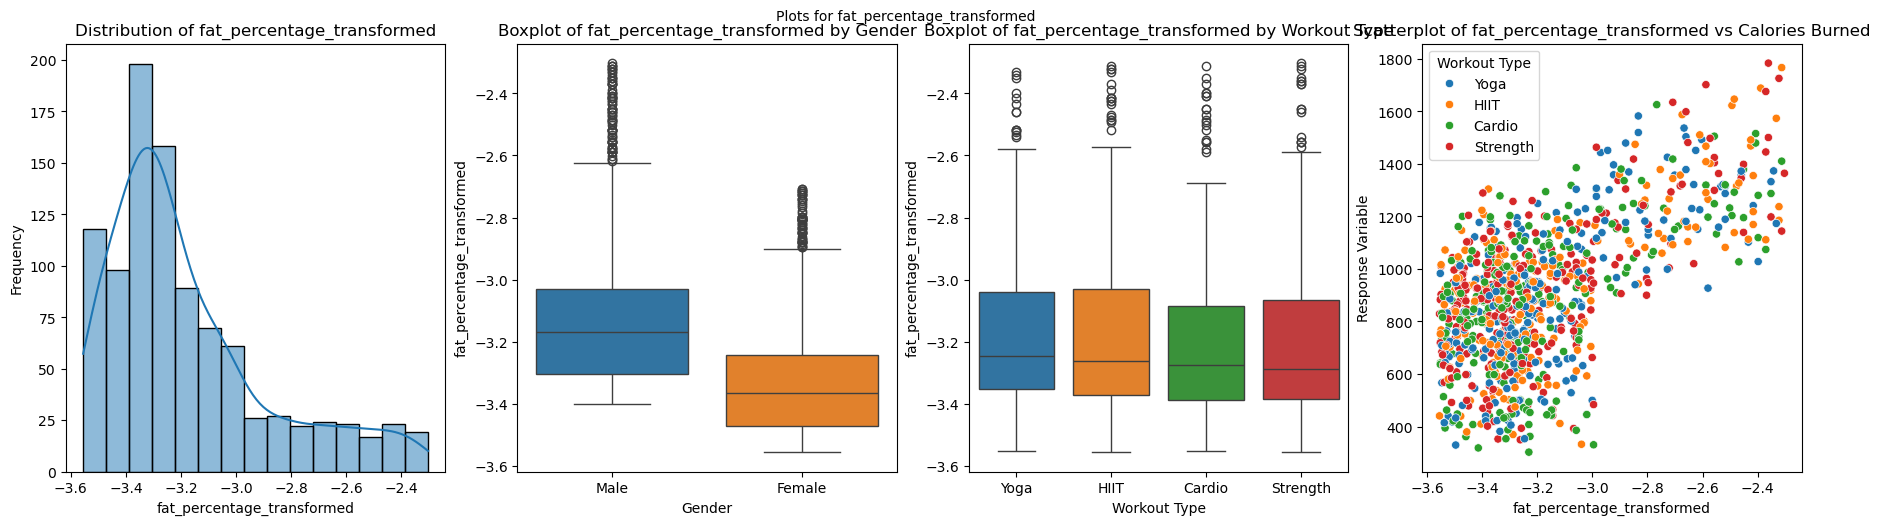

In [173]:
gym_data['fat_percentage_transformed'] = (1/(gym_data['fat_percentage']))
plot_numeric('fat_percentage_transformed')

In [185]:
x_cols = ['age','avg_bpm','session_duration','fat_percentage', 'gender_encoded']

sm_train_x_dummy_vars = train_data_full[x_cols]
sm_train_y = train_data_full[['calories_burned']]

# test sets
sm_test_x_dummy_vars = test_data_full[x_cols]
sm_test_y = test_data_full[['calories_burned']]

#sm_train_x_dummy_vars['fat_percentage_transformed'] = (1/(sm_train_x_dummy_vars['fat_percentage']))
#sm_test_x_dummy_vars['fat_percentage_transformed'] = (1/(sm_test_x_dummy_vars['fat_percentage']))

#sm_train_x_dummy_vars['fat_percentage_duration'] = sm_train_x_dummy_vars['fat_percentage_transformed'] * sm_train_x_dummy_vars['session_duration']
#sm_test_x_dummy_vars['fat_percentage_duration'] = sm_test_x_dummy_vars['fat_percentage_transformed'] * sm_test_x_dummy_vars['session_duration']

#sm_train_x_dummy_vars = sm_train_x_dummy_vars.drop('fat_percentage', axis = 1)
#sm_test_x_dummy_vars = sm_test_x_dummy_vars.drop('fat_percentage', axis = 1)


sm_train_x_dummy_vars = sm.add_constant(sm_train_x_dummy_vars)

# Fit the model using statsmodels
mlr_v1 = sm.OLS(sm_train_y, sm_train_x_dummy_vars).fit()

# Get the summary
print(mlr_v1.summary())

                            OLS Regression Results                            
Dep. Variable:        calories_burned   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6840.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:33:08   Log-Likelihood:                -3982.6
No. Observations:                 778   AIC:                             7977.
Df Residuals:                     772   BIC:                             8005.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -786.2142     21.075  

Mean Squared Error: 1269.595643633497
RMSE: 35.63138565413219
R² Score: 0.9828116349243196


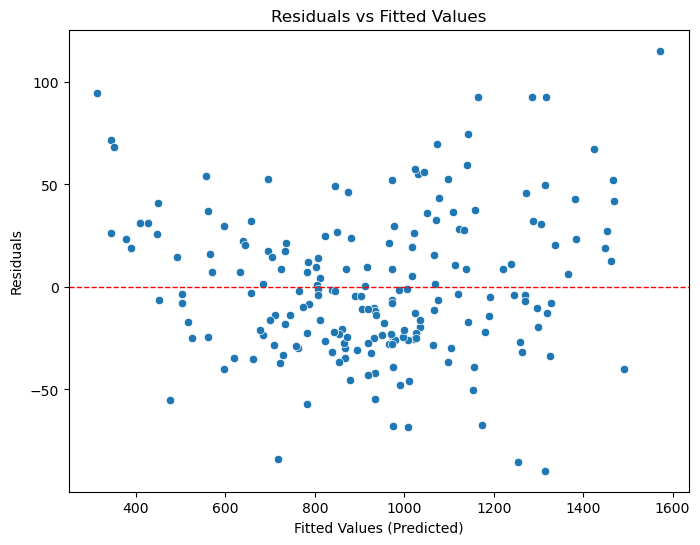

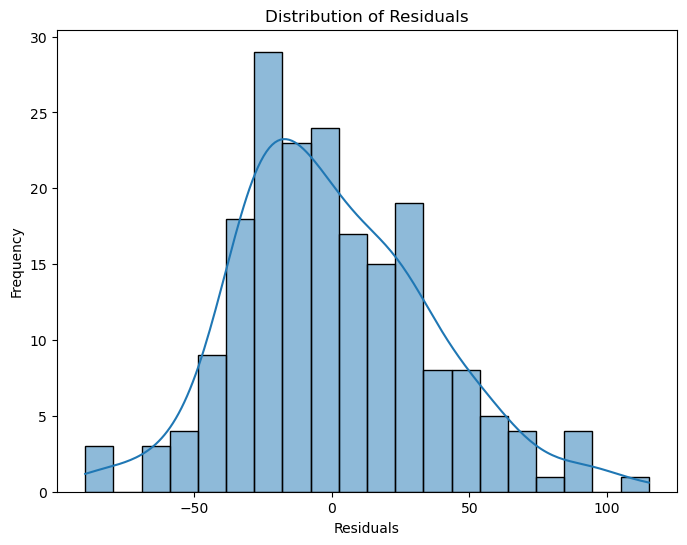

In [186]:
sm_test_x_dummy_vars = sm.add_constant(sm_test_x_dummy_vars)

predictions = mlr_v1.predict(sm_test_x_dummy_vars)

# Example: Evaluate model predictions on test data
mse = mean_squared_error(sm_test_y, predictions)
r2 = r2_score(sm_test_y, predictions)

print("Mean Squared Error:", mse)
print("RMSE:", mse**(0.5))
print("R² Score:", r2)
test_predictions = mlr_v1.predict(sm_test_x_dummy_vars)
residuals = sm_test_y['calories_burned'] - test_predictions

# Step 2: Plot Residuals vs Fitted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()

# Step 3: Plot Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [190]:
mlr_v1.predict([0, 25, 130, 0.95, 15, 1])

array([1479.18189664])